In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gensim

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv("Train.csv")
train_data.head()


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
test_data = pd.read_csv("Test.csv")
test_data.head()


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [4]:
valid_data = pd.read_csv("Valid.csv")
valid_data.head()


,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [5]:
train_data.shape, test_data.shape, valid_data.shape

((40000, 2), (5000, 2), (5000, 2))

In [6]:
df=pd.concat([train_data,test_data,valid_data],axis=0,ignore_index=True)

In [7]:
df.shape

(50000, 2)

In [8]:
df.head(20)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [9]:
df.label.value_counts()

0    25000
1    25000
Name: label, dtype: int64

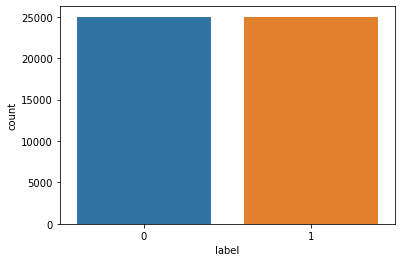

In [11]:
sns.countplot(x="label",data=df)
plt.show()

In [12]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
df_text=df.text.apply(gensim.utils.simple_preprocess)
df_text.head(10)

0    [grew, up, watching, and, loving, the, thunder...
1    [when, put, this, movie, in, my, dvd, player, ...
2    [why, do, people, who, do, not, know, what, pa...
3    [even, though, have, great, interest, in, bibl...
4    [im, die, hard, dads, army, fan, and, nothing,...
5    [terrible, movie, as, everyone, has, said, wha...
6    [finally, watched, this, shocking, movie, last...
7    [caught, this, film, on, azn, on, cable, it, s...
8    [it, may, be, the, remake, of, autumn, tale, a...
9    [my, super, ex, girlfriend, turned, out, to, b...
Name: text, dtype: object

In [14]:
df_text.iloc[0]

['grew',
 'up',
 'watching',
 'and',
 'loving',
 'the',
 'thunderbirds',
 'all',
 'my',
 'mates',
 'at',
 'school',
 'watched',
 'we',
 'played',
 'thunderbirds',
 'before',
 'school',
 'during',
 'lunch',
 'and',
 'after',
 'school',
 'we',
 'all',
 'wanted',
 'to',
 'be',
 'virgil',
 'or',
 'scott',
 'no',
 'one',
 'wanted',
 'to',
 'be',
 'alan',
 'counting',
 'down',
 'from',
 'became',
 'an',
 'art',
 'form',
 'took',
 'my',
 'children',
 'to',
 'see',
 'the',
 'movie',
 'hoping',
 'they',
 'would',
 'get',
 'glimpse',
 'of',
 'what',
 'loved',
 'as',
 'child',
 'how',
 'bitterly',
 'disappointing',
 'the',
 'only',
 'high',
 'point',
 'was',
 'the',
 'snappy',
 'theme',
 'tune',
 'not',
 'that',
 'it',
 'could',
 'compare',
 'with',
 'the',
 'original',
 'score',
 'of',
 'the',
 'thunderbirds',
 'thankfully',
 'early',
 'saturday',
 'mornings',
 'one',
 'television',
 'channel',
 'still',
 'plays',
 'reruns',
 'of',
 'the',
 'series',
 'gerry',
 'anderson',
 'and',
 'his',
 'wife

In [15]:
rev=[0]*df.shape[0]
for i in range(0,df.shape[0]):
    str=" "
    re=df_text[i]
    rev[i]=str.join(re)
print('\nre is: ',df_text[0])
print('\nrev is: ',rev[0])



re is:  ['grew', 'up', 'watching', 'and', 'loving', 'the', 'thunderbirds', 'all', 'my', 'mates', 'at', 'school', 'watched', 'we', 'played', 'thunderbirds', 'before', 'school', 'during', 'lunch', 'and', 'after', 'school', 'we', 'all', 'wanted', 'to', 'be', 'virgil', 'or', 'scott', 'no', 'one', 'wanted', 'to', 'be', 'alan', 'counting', 'down', 'from', 'became', 'an', 'art', 'form', 'took', 'my', 'children', 'to', 'see', 'the', 'movie', 'hoping', 'they', 'would', 'get', 'glimpse', 'of', 'what', 'loved', 'as', 'child', 'how', 'bitterly', 'disappointing', 'the', 'only', 'high', 'point', 'was', 'the', 'snappy', 'theme', 'tune', 'not', 'that', 'it', 'could', 'compare', 'with', 'the', 'original', 'score', 'of', 'the', 'thunderbirds', 'thankfully', 'early', 'saturday', 'mornings', 'one', 'television', 'channel', 'still', 'plays', 'reruns', 'of', 'the', 'series', 'gerry', 'anderson', 'and', 'his', 'wife', 'created', 'jonatha', 'frakes', 'should', 'hand', 'in', 'his', 'directors', 'chair', 'his'

In [17]:
cv=CountVectorizer()
text=cv.fit_transform(rev)
print(text[0])

  (0, 37008)	1
  (0, 93228)	1
  (0, 95848)	1
  (0, 2919)	3
  (0, 51898)	1
  (0, 87880)	7
  (0, 88430)	3
  (0, 2102)	2
  (0, 58852)	2
  (0, 54324)	1
  (0, 4913)	1
  (0, 76772)	3
  (0, 95841)	1
  (0, 95992)	2
  (0, 66616)	1
  (0, 7441)	1
  (0, 26090)	1
  (0, 52179)	1
  (0, 1363)	1
  (0, 95639)	2
  (0, 88923)	3
  (0, 7101)	3
  (0, 94794)	1
  (0, 62338)	1
  (0, 77006)	1
  :	:
  (0, 79183)	1
  (0, 38390)	1
  (0, 42862)	1
  (0, 23585)	1
  (0, 14131)	1
  (0, 94321)	1
  (0, 17221)	1
  (0, 41027)	1
  (0, 95812)	1
  (0, 31389)	1
  (0, 93546)	1
  (0, 74899)	1
  (0, 14072)	1
  (0, 72338)	1
  (0, 54534)	1
  (0, 443)	1
  (0, 11980)	1
  (0, 72659)	1
  (0, 53833)	1
  (0, 40831)	1
  (0, 75964)	2
  (0, 84717)	1
  (0, 41517)	1
  (0, 28532)	1
  (0, 46347)	1


In [18]:
X_train,X_test,y_train,y_test=train_test_split(text,df.label,test_size=0.15)

In [19]:
lg=LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred=lg.predict(X_test)
acc_lg=round(accuracy_score(y_pred, y_test)*100, 2)
print(f'Test Set Accuracy score: {acc_lg}%')

Test Set Accuracy score: 89.09%


In [20]:
x_pred=lg.predict(X_train)
acc_lg=round(accuracy_score(x_pred, y_train)*100, 2)
print(f'Train set Accuracy score: {acc_lg}%')

Train set Accuracy score: 99.68%


In [48]:
text=['This movie is so good','This movie is so bad']
df_my_text = pd.Series(text)


In [49]:
df_my_text[0]

'This movie is so good'

In [50]:
my_text=df_my_text.apply(gensim.utils.simple_preprocess)


In [51]:
my_text.head()

0    [this, movie, is, so, good]
1     [this, movie, is, so, bad]
dtype: object

In [52]:
n_rev=[0]*df_my_text.shape[0]
for i in range(0,df_my_text.shape[0]):
    str=" "
    n_re=my_text[i]
    print('\nre is: ',n_re)
    n_rev[i]=str.join(n_re)
    print('\nrev is: ',n_rev[i])



re is:  ['this', 'movie', 'is', 'so', 'good']

rev is:  this movie is so good

re is:  ['this', 'movie', 'is', 'so', 'bad']

rev is:  this movie is so bad


In [53]:
n_text=cv.fit_transform(n_rev)
print(n_text)

  (0, 5)	1
  (0, 3)	1
  (0, 2)	1
  (0, 4)	1
  (0, 1)	1
  (1, 5)	1
  (1, 3)	1
  (1, 2)	1
  (1, 4)	1
  (1, 0)	1


In [55]:
text_pred=lg.predict(n_text)

ValueError: X has 6 features, but LogisticRegression is expecting 99476 features as input.

In [58]:
t_cat_df = df.loc[0:5,'text']
l_cat_df = df.loc[0:5,'label']
t_cat_df.head()

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
4    Im a die hard Dads Army fan and nothing will e...
Name: text, dtype: object

In [59]:
my_text=t_cat_df.apply(gensim.utils.simple_preprocess)

In [60]:
my_text.head()

0    [grew, up, watching, and, loving, the, thunder...
1    [when, put, this, movie, in, my, dvd, player, ...
2    [why, do, people, who, do, not, know, what, pa...
3    [even, though, have, great, interest, in, bibl...
4    [im, die, hard, dads, army, fan, and, nothing,...
Name: text, dtype: object

In [61]:
n_rev=[0]*t_cat_df.shape[0]
for i in range(0,t_cat_df.shape[0]):
    str=" "
    n_re=my_text[i]
    print('\nre is: ',n_re)
    n_rev[i]=str.join(n_re)
    print('\nrev is: ',n_rev[i])


re is:  ['grew', 'up', 'watching', 'and', 'loving', 'the', 'thunderbirds', 'all', 'my', 'mates', 'at', 'school', 'watched', 'we', 'played', 'thunderbirds', 'before', 'school', 'during', 'lunch', 'and', 'after', 'school', 'we', 'all', 'wanted', 'to', 'be', 'virgil', 'or', 'scott', 'no', 'one', 'wanted', 'to', 'be', 'alan', 'counting', 'down', 'from', 'became', 'an', 'art', 'form', 'took', 'my', 'children', 'to', 'see', 'the', 'movie', 'hoping', 'they', 'would', 'get', 'glimpse', 'of', 'what', 'loved', 'as', 'child', 'how', 'bitterly', 'disappointing', 'the', 'only', 'high', 'point', 'was', 'the', 'snappy', 'theme', 'tune', 'not', 'that', 'it', 'could', 'compare', 'with', 'the', 'original', 'score', 'of', 'the', 'thunderbirds', 'thankfully', 'early', 'saturday', 'mornings', 'one', 'television', 'channel', 'still', 'plays', 'reruns', 'of', 'the', 'series', 'gerry', 'anderson', 'and', 'his', 'wife', 'created', 'jonatha', 'frakes', 'should', 'hand', 'in', 'his', 'directors', 'chair', 'his'

In [62]:
n_text=cv.fit_transform(n_rev)
print(n_text)

  (0, 187)	1
  (0, 433)	1
  (0, 450)	1
  (0, 20)	3
  (0, 251)	1
  (0, 403)	7
  (0, 416)	3
  (0, 13)	2
  (0, 284)	2
  (0, 259)	1
  (0, 32)	1
  (0, 357)	3
  (0, 449)	1
  (0, 452)	2
  (0, 316)	1
  (0, 46)	1
  (0, 122)	1
  (0, 253)	1
  (0, 9)	1
  (0, 444)	2
  (0, 419)	3
  (0, 43)	3
  (0, 441)	1
  (0, 304)	1
  (0, 359)	1
  :	:
  (5, 86)	1
  (5, 323)	1
  (5, 100)	1
  (5, 224)	1
  (5, 192)	1
  (5, 266)	2
  (5, 213)	1
  (5, 153)	1
  (5, 23)	1
  (5, 88)	1
  (5, 11)	1
  (5, 370)	1
  (5, 130)	1
  (5, 409)	1
  (5, 7)	1
  (5, 171)	1
  (5, 156)	1
  (5, 406)	1
  (5, 330)	1
  (5, 337)	1
  (5, 218)	1
  (5, 82)	1
  (5, 256)	1
  (5, 215)	1
  (5, 285)	1


In [81]:
X_train,X_test,y_train,y_test=train_test_split(n_text,l_cat_df,test_size=0.5)
text_pred=lg.predict(X_train)

ValueError: X has 473 features, but LogisticRegression is expecting 99476 features as input.